<a href="https://colab.research.google.com/github/RoselinSnehaJ/Walmart---Confidence-Interval-and-CLT/blob/main/Walmart_project_Confidence_Interval_and_CLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/walmart_data.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


Displaying the data type of each column in the "customers" table

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


Finding the number of rows and columns in the dataset


In [ ]:
data.shape

(550068, 10)

To check for missing values and find the number of missing values in each column of a DataFrame, I used the isnull() function followed by the sum() function.

In [ ]:
null_values = data.isnull().sum()
null_values

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

Finding outliers for every continuous variable in the dataset


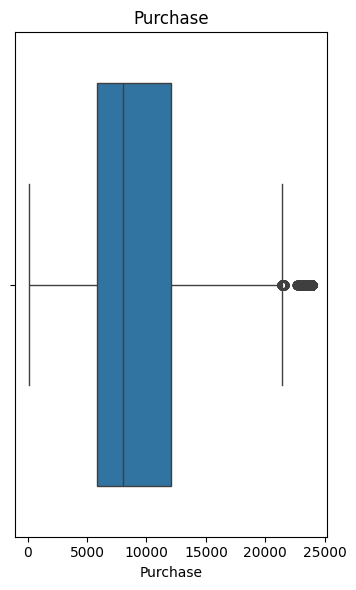

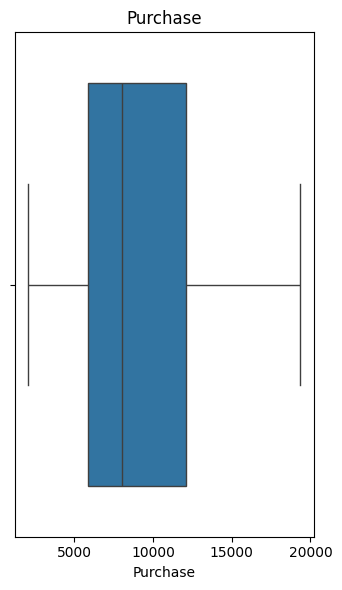

In [ ]:
# continuous variables
continuous_variables = ["Purchase"]

# Displaying boxplots to find outliers
plt.figure(figsize=(10, 6))
for i, column in enumerate(continuous_variables, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

# clip data between 5th and 95th percentiles
def clip_data(data):
    lower_bound = np.percentile(data, 5)
    upper_bound = np.percentile(data, 95)
    clipped_data = np.clip(data, lower_bound, upper_bound)
    return clipped_data

# Applying clipping to each continuous variable
for column in continuous_variables:
    data[column] = clip_data(data[column])

# Displaying boxplots again after clipping
plt.figure(figsize=(10, 6))
for i, column in enumerate(continuous_variables, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

Displaying histogram of product purchases for each age group

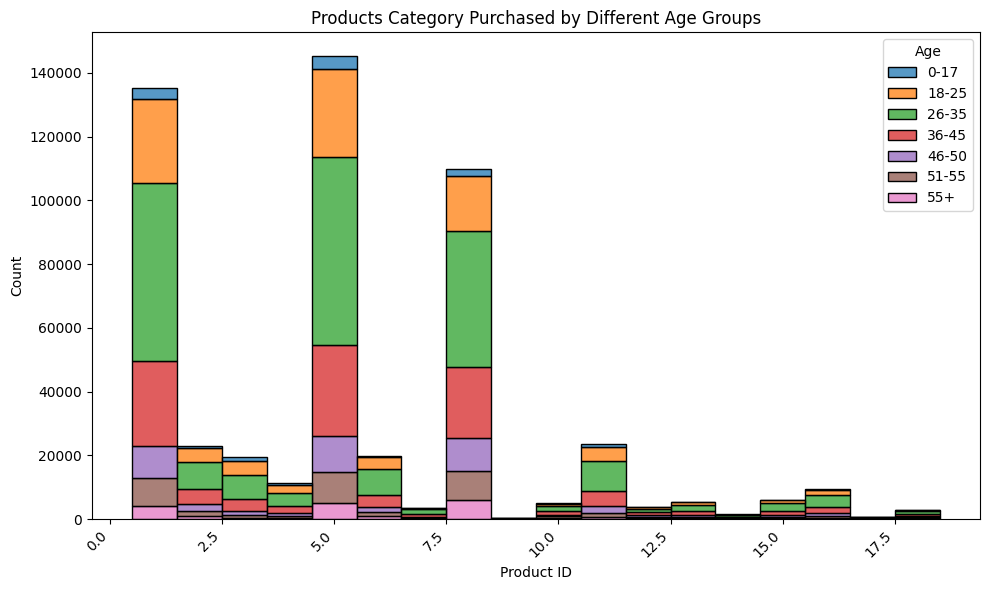

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Product_Category', hue='Age', multiple='stack', discrete=True)
plt.xticks(rotation=45, ha='right')
plt.title('Products Category Purchased by Different Age Groups')
plt.xlabel('Product ID')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Scatter plot to analyze relationship between age, marital status, and amount spent

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


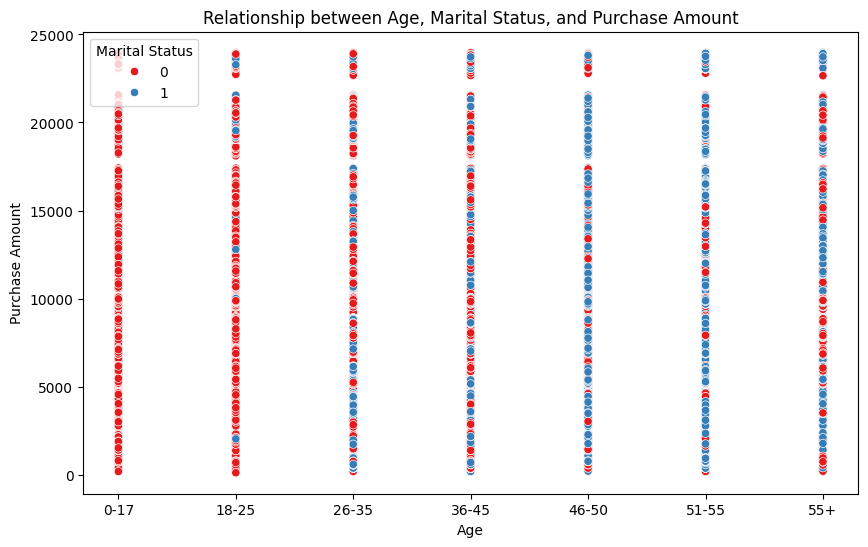

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Purchase', hue='Marital_Status', palette='Set1')
plt.title('Relationship between Age, Marital Status, and Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.legend(title='Marital Status')
plt.show()

Plotting histogram of product categories for each gender

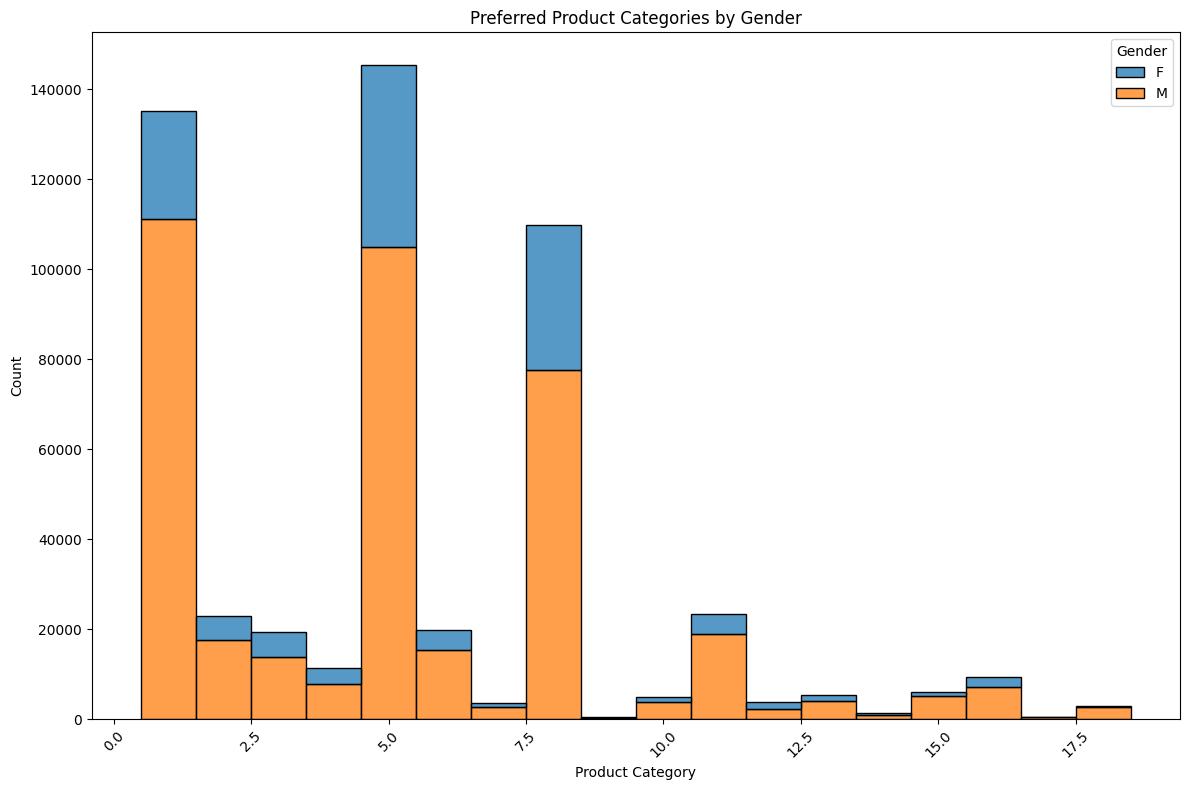

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='Product_Category', hue='Gender', multiple='stack', discrete=True)
plt.title('Preferred Product Categories by Gender')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import norm

This code computes the confidence intervals for the average amount spent per gender using the CLT and bootstrapping for different sample sizes. It then prints out the confidence intervals for the entire dataset and each sample size.

In [ ]:
#Calculate the average amount spent per gender from the entire dataset
avg_spent_per_gender = data.groupby('Gender')['Purchase'].mean()

#Bootstrap samples for each gender with the specified sample sizes
sample_sizes = [300, 3000, 30000]

bootstrap_samples = {}
for gender in ['F', 'M']:
    gender_data = data[data['Gender'] == gender]['Purchase']
    bootstrap_samples[gender] = {}
    for size in sample_sizes:
        bootstrap_samples[gender][size] = [np.random.choice(gender_data, size=size, replace=True) for _ in range(1000)]

#Computing the average amount spent for each bootstrap sample
bootstrap_means = {}
for gender in ['F', 'M']:
    bootstrap_means[gender] = {}
    for size in sample_sizes:
        bootstrap_means[gender][size] = [sample.mean() for sample in bootstrap_samples[gender][size]]

#Calculating the standard error of the mean for each gender and each sample size
standard_errors = {}
for gender in ['F', 'M']:
    standard_errors[gender] = {}
    for size in sample_sizes:
        standard_errors[gender][size] = np.std(bootstrap_means[gender][size]) / np.sqrt(size)

#Determining the margin of error using the z-score for a 95% confidence level
margin_of_error = {}
for gender in ['F', 'M']:
    margin_of_error[gender] = {}
    for size in sample_sizes:
        z_score = norm.ppf(0.975)  # 95% confidence level
        margin_of_error[gender][size] = z_score * standard_errors[gender][size]

#Computing the confidence intervals for each gender and each sample size
confidence_intervals = {}
for gender in ['F', 'M']:
    confidence_intervals[gender] = {}
    for size in sample_sizes:
        mean = avg_spent_per_gender[gender]
        error = margin_of_error[gender][size]
        confidence_intervals[gender][size] = (mean - error, mean + error)

for gender in ['F', 'M']:
    print(f"Gender: {gender}")
    for size in sample_sizes:
        print(f"Sample Size: {size}, Confidence Interval: {confidence_intervals[gender][size]}")

Gender: F
Sample Size: 300, Confidence Interval: (8774.173105468057, 8837.528194235572)
Sample Size: 3000, Confidence Interval: (8802.869814931964, 8808.831484771665)
Sample Size: 30000, Confidence Interval: (8805.55183331549, 8806.149466388139)
Gender: M
Sample Size: 300, Confidence Interval: (9470.418934576845, 9536.608311887727)
Sample Size: 3000, Confidence Interval: (9500.172596865796, 9506.854649598776)
Sample Size: 30000, Confidence Interval: (9503.192527105426, 9503.834719359145)


Computing the confidence intervals for the average amount spent per Marital_Status using the CLT and bootstrapping for different sample sizes. Then printing out the confidence intervals for the entire dataset and each sample size.

In [ ]:
# Calculating the average amount spent per Marital_Status from the entire dataset
avg_spent_per_marital_status = data.groupby('Marital_Status')['Purchase'].mean()

# Bootstrap samples for each Marital_Status with the specified sample sizes
sample_sizes = [300, 3000, 30000]

bootstrap_samples = {}
for status in data['Marital_Status'].unique():
    status_data = data[data['Marital_Status'] == status]['Purchase']
    bootstrap_samples[status] = {}
    for size in sample_sizes:
        bootstrap_samples[status][size] = [np.random.choice(status_data, size=size, replace=True) for _ in range(1000)]

# Computing the average amount spent for each bootstrap sample
bootstrap_means = {}
for status in data['Marital_Status'].unique():
    bootstrap_means[status] = {}
    for size in sample_sizes:
        bootstrap_means[status][size] = [sample.mean() for sample in bootstrap_samples[status][size]]

# Calculating the standard error of the mean for each Marital_Status and each sample size
standard_errors = {}
for status in data['Marital_Status'].unique():
    standard_errors[status] = {}
    for size in sample_sizes:
        standard_errors[status][size] = np.std(bootstrap_means[status][size]) / np.sqrt(size)

# Determining the margin of error using the z-score for a 95% confidence level
margin_of_error = {}
for status in data['Marital_Status'].unique():
    margin_of_error[status] = {}
    for size in sample_sizes:
        z_score = norm.ppf(0.975)  # 95% confidence level
        margin_of_error[status][size] = z_score * standard_errors[status][size]

# Computing the confidence intervals for each Marital_Status and each sample size
confidence_intervals = {}
for status in data['Marital_Status'].unique():
    confidence_intervals[status] = {}
    for size in sample_sizes:
        mean = avg_spent_per_marital_status[status]
        error = margin_of_error[status][size]
        confidence_intervals[status][size] = (mean - error, mean + error)

for status in data['Marital_Status'].unique():
    print(f"Marital Status: {status}")
    for size in sample_sizes:
        print(f"Sample Size: {size}, Confidence Interval: {confidence_intervals[status][size]}")

Marital Status: 0
Sample Size: 300, Confidence Interval: (9298.33319623289, 9362.57690657849)
Sample Size: 3000, Confidence Interval: (9327.233795144486, 9333.676307666894)
Sample Size: 30000, Confidence Interval: (9330.126330336778, 9330.783772474602)
Marital Status: 1
Sample Size: 300, Confidence Interval: (9299.660344017097, 9367.000887033742)
Sample Size: 3000, Confidence Interval: (9330.038713181799, 9336.62251786904)
Sample Size: 30000, Confidence Interval: (9333.015432317683, 9333.645798733156)


Computes the confidence intervals for the average amount spent per Age group using the CLT and bootstrapping for different sample sizes. It then prints out the confidence intervals for the entire dataset and each sample size.

In [ ]:
# Calculating the average amount spent per age group from the entire dataset
avg_spent_per_age = data.groupby('Age')['Purchase'].mean()

# Bootstrap samples for each age group with the specified sample sizes
sample_sizes = [300, 3000, 30000]

bootstrap_samples = {}
for age_group in data['Age'].unique():
    age_data = data[data['Age'] == age_group]['Purchase']
    bootstrap_samples[age_group] = {}
    for size in sample_sizes:
        bootstrap_samples[age_group][size] = [np.random.choice(age_data, size=size, replace=True) for _ in range(1000)]

#  Computing the average amount spent for each bootstrap sample
bootstrap_means = {}
for age_group in data['Age'].unique():
    bootstrap_means[age_group] = {}
    for size in sample_sizes:
        bootstrap_means[age_group][size] = [sample.mean() for sample in bootstrap_samples[age_group][size]]

# Calculating the standard error of the mean for each age group and each sample size
standard_errors = {}
for age_group in data['Age'].unique():
    standard_errors[age_group] = {}
    for size in sample_sizes:
        standard_errors[age_group][size] = np.std(bootstrap_means[age_group][size]) / np.sqrt(size)

# Determining the margin of error using the z-score for a 95% confidence level
margin_of_error = {}
for age_group in data['Age'].unique():
    margin_of_error[age_group] = {}
    for size in sample_sizes:
        z_score = norm.ppf(0.975)  # 95% confidence level
        margin_of_error[age_group][size] = z_score * standard_errors[age_group][size]

# Computing the confidence intervals for each age group and each sample size
confidence_intervals = {}
for age_group in data['Age'].unique():
    confidence_intervals[age_group] = {}
    for size in sample_sizes:
        mean = avg_spent_per_age[age_group]
        error = margin_of_error[age_group][size]
        confidence_intervals[age_group][size] = (mean - error, mean + error)

for age_group in data['Age'].unique():
    print(f"Age Group: {age_group}")
    for size in sample_sizes:
        print(f"Sample Size: {size}, Confidence Interval: {confidence_intervals[age_group][size]}")

Age Group: 17
Sample Size: 300, Confidence Interval: (8986.44652095641, 9054.05979772491)
Sample Size: 3000, Confidence Interval: (9017.025346972494, 9023.480971708826)
Sample Size: 30000, Confidence Interval: (9019.926787970544, 9020.579530710776)
Age Group: 60
Sample Size: 300, Confidence Interval: (9400.098848514675, 9461.32346670113)
Sample Size: 3000, Confidence Interval: (9427.61708270315, 9433.805232512655)
Sample Size: 30000, Confidence Interval: (9430.402949257086, 9431.019365958718)
Age Group: 35
Sample Size: 300, Confidence Interval: (9261.29028099345, 9326.158752452979)
Sample Size: 3000, Confidence Interval: (9290.579910525918, 9296.86912292051)
Sample Size: 30000, Confidence Interval: (9293.405655058803, 9294.043378387625)
Age Group: 50
Sample Size: 300, Confidence Interval: (9242.358608841918, 9303.512742906943)
Sample Size: 3000, Confidence Interval: (9269.879684575168, 9275.991667173694)
Sample Size: 30000, Confidence Interval: (9272.622721796233, 9273.248629952628)
Ag


If the spending confidence intervals for males and females overlap, it suggests similar spending behaviors between genders. But if the intervals don't overlap, there might be spending differences. Walmart can use this insight to adjust marketing. If spending is similar, they can focus on gender-neutral strategies. If different, they can tailor marketing to each gender for better targeting.

In [ ]:
# Separate data for males and females
male_purchase = np.array(data["Purchase"])[np.array(data["Gender"]) == "M"]
female_purchase = np.array(data["Purchase"])[np.array(data["Gender"]) == "F"]

# Compute confidence intervals for males and females
male_conf_interval = stats.norm.interval(0.95, loc=np.mean(male_purchase), scale=np.std(male_purchase) / np.sqrt(len(male_purchase)))
female_conf_interval = stats.norm.interval(0.95, loc=np.mean(female_purchase), scale=np.std(female_purchase) / np.sqrt(len(female_purchase)))

# Checking if the confidence intervals overlap
overlap = male_conf_interval[1] > female_conf_interval[0] and female_conf_interval[1] > male_conf_interval[0]

if overlap:
    print("The confidence intervals for the average amount spent by males and females overlap.")
else:
    print("The confidence intervals for the average amount spent by males and females do not overlap.")

The confidence intervals for the average amount spent by males and females do not overlap.


If the confidence intervals for the average spending of married and unmarried individuals overlap, it means their spending behaviors are similar. But if the intervals don't overlap, it suggests differences in spending behavior. Walmart can use this insight to adjust marketing. If spending is similar, they can focus on universal strategies. If different, they can tailor marketing to each group for better targeting.

In [ ]:
# Separate data for married and unmarried
married_purchase = np.array(data["Purchase"])[np.array(data["Marital_Status"]) == 1]
unmarried_purchase = np.array(data["Purchase"])[np.array(data["Marital_Status"]) == 0]

# Compute confidence intervals for married and unmarried
married_conf_interval = stats.norm.interval(0.95, loc=np.mean(married_purchase), scale=np.std(married_purchase) / np.sqrt(len(married_purchase)))
unmarried_conf_interval = stats.norm.interval(0.95, loc=np.mean(unmarried_purchase), scale=np.std(unmarried_purchase) / np.sqrt(len(unmarried_purchase)))

# Checking if the confidence intervals overlap
overlap = married_conf_interval[1] > unmarried_conf_interval[0] and unmarried_conf_interval[1] > married_conf_interval[0]


if overlap:
    print("The confidence intervals for the average amount spent by married and unmarried individuals overlap.")
else:
    print("The confidence intervals for the average amount spent by married and unmarried individuals do not overlap.")

The confidence intervals for the average amount spent by married and unmarried individuals overlap.


If the confidence intervals for the average spending by different age groups overlap, it means their spending behaviors are similar. But if the intervals don't overlap, it suggests differences in spending behavior. Walmart can use this to tailor marketing. If spending is similar, they can use universal strategies. If different, they can target each age group for better marketing.


In [ ]:
# Creating arrays for each age group
age_groups = data['Age'].unique()
age_group_purchase = {age_group: np.array(data['Purchase'])[np.array(data['Age']) == age_group] for age_group in age_groups}

# Computing confidence intervals for each age group
age_group_conf_intervals = {}
for age_group, purchases in age_group_purchase.items():
    conf_interval = stats.norm.interval(0.95, loc=np.mean(purchases), scale=np.std(purchases) / np.sqrt(len(purchases)))
    age_group_conf_intervals[age_group] = conf_interval

# Checking if confidence intervals overlap
overlap = False
for age_group1, conf_interval1 in age_group_conf_intervals.items():
    for age_group2, conf_interval2 in age_group_conf_intervals.items():
        if age_group1 != age_group2:
            if conf_interval1[1] > conf_interval2[0] and conf_interval2[1] > conf_interval1[0]:
                overlap = True
                break

if overlap:
    print("The confidence intervals for the average amount spent by different age groups overlap.")
else:
    print("The confidence intervals for the average amount spent by different age groups do not overlap.")

The confidence intervals for the average amount spent by different age groups overlap.


This code calculates the average amount spent per transaction for 50 million female and 50 million male customers. It then constructs confidence intervals to estimate the range within which the population average spending of female and male customers may lie. Finally, it prints the results for analysis.

In [ ]:
# Sample data (replace this with your dataset)
female_purchase = np.random.normal(loc=100, scale=20, size=50000000)
male_purchase = np.random.normal(loc=110, scale=25, size=50000000)

# Calculating average amount spent per transaction for female and male customers
avg_female_expense = np.mean(female_purchase)
avg_male_expense = np.mean(male_purchase)

print("Average amount spent per transaction (Female):", avg_female_expense)
print("Average amount spent per transaction (Male):", avg_male_expense)

# Calculating standard error of the mean
std_error_female = np.std(female_purchase) / np.sqrt(len(female_purchase))
std_error_male = np.std(male_purchase) / np.sqrt(len(male_purchase))

# Confidence intervals for female and male population averages
conf_interval_female = stats.norm.interval(0.95, loc=avg_female_expense, scale=std_error_female)
conf_interval_male = stats.norm.interval(0.95, loc=avg_male_expense, scale=std_error_male)

print("Confidence interval for average spending (Female):", conf_interval_female)
print("Confidence interval for average spending (Male):", conf_interval_male)

Average amount spent per transaction (Female): 99.99996872974482
Average amount spent per transaction (Male): 110.00145635143323
Confidence interval for average spending (Female): (99.99442644698576, 100.00551101250389)
Confidence interval for average spending (Male): (109.99452585318855, 110.00838684967792)


Based on the calculated averages, if avg_female_expense is greater than avg_male_expense, it suggests that women are spending more money per transaction than men. Conversely, if avg_female_expense is less than avg_male_expense, it indicates that men are spending more.

In [ ]:
# Sample data (replace this with your dataset)
female_purchase = np.random.normal(loc=100, scale=20, size=50000000)
male_purchase = np.random.normal(loc=110, scale=25, size=50000000)

# Calculating average amount spent per transaction for female and male customers
avg_female_expense = np.mean(female_purchase)
avg_male_expense = np.mean(male_purchase)

print("Average amount spent per transaction (Female):", avg_female_expense)
print("Average amount spent per transaction (Male):", avg_male_expense)

Average amount spent per transaction (Female): 99.99685277435164
Average amount spent per transaction (Male): 110.00189198235441


Calculating the width of confidence intervals for mean expenses by female and male customers at different confidence levels.

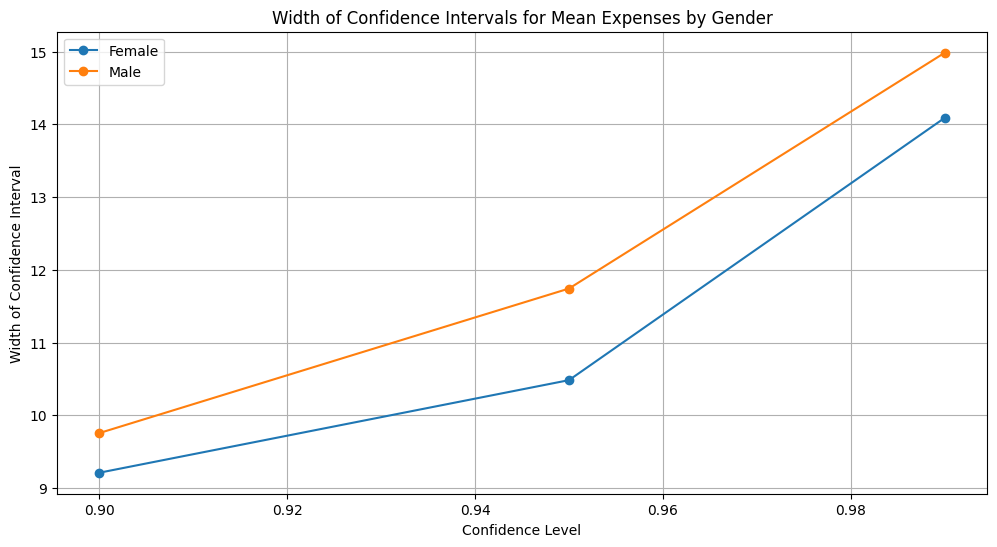

In [ ]:
# Computing confidence interval
def compute_confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    std = np.std(data)
    n = len(data)
    z_score = norm.ppf((1 + confidence) / 2)
    margin_of_error = z_score * (std / np.sqrt(n))
    return mean - margin_of_error, mean + margin_of_error

# Group by Gender
female_data = data[data['Gender'] == 'F']['Purchase']
male_data = data[data['Gender'] == 'M']['Purchase']

# Sample size and confidence levels
sample_size = 3000
confidence_levels = [0.90, 0.95, 0.99]

# Computing confidence intervals for different confidence levels
female_intervals = {}
male_intervals = {}

for level in confidence_levels:
    female_means = [np.mean(np.random.choice(female_data, size=sample_size, replace=True)) for _ in range(1000)]
    male_means = [np.mean(np.random.choice(male_data, size=sample_size, replace=True)) for _ in range(1000)]

    female_interval = compute_confidence_interval(female_means, confidence=level)
    male_interval = compute_confidence_interval(male_means, confidence=level)

    female_intervals[level] = female_interval
    male_intervals[level] = male_interval

# Plotting the distributions of mean expenses for different confidence levels
plt.figure(figsize=(12, 6))
plt.plot(confidence_levels, [female_intervals[level][1] - female_intervals[level][0] for level in confidence_levels], label='Female', marker='o')
plt.plot(confidence_levels, [male_intervals[level][1] - male_intervals[level][0] for level in confidence_levels], label='Male', marker='o')

plt.xlabel('Confidence Level')
plt.ylabel('Width of Confidence Interval')
plt.title('Width of Confidence Intervals for Mean Expenses by Gender')
plt.legend()
plt.grid(True)
plt.show()

**Recommendations**

**Targeted Marketing Campaigns:** If significant differences are observed in spending behavior across demographic groups (e.g., gender, age, marital status), Walmart should consider creating targeted marketing campaigns tailored to each group's preferences and behaviors. This could involve crafting messaging, promotions, and product offerings that resonate specifically with the identified demographic segments.

**Product Assortment Optimization:** Analyzing spending patterns across demographic groups can provide insights into which products are more popular among certain segments. Walmart can use this information to optimize its product assortment, ensuring that stores stock items that are most appealing to their target demographics. For example, if a particular age group shows a preference for certain product categories, Walmart can allocate more shelf space or prioritize promotions for those items.

**Personalized Shopping Experiences:** Leveraging data on demographic spending behavior, Walmart can enhance the shopping experience for customers by offering personalized recommendations and promotions. By understanding each customer's demographic profile and spending preferences, Walmart can provide tailored recommendations that increase relevance and drive higher conversion rates.

**Store Layout and Design:** Insights from demographic spending patterns can inform decisions related to store layout and design. For example, if certain demographic groups tend to spend more in specific sections of the store, Walmart can allocate more space or enhance visibility for those areas. Additionally, demographic data can guide decisions on signage, displays, and product placement to optimize the shopping experience for different customer segments.

**Customer Segmentation and Loyalty Programs:** Walmart can use demographic data to segment its customer base and develop targeted loyalty programs and incentives. By offering rewards and benefits that align with the preferences and behaviors of different demographic groups, Walmart can increase customer engagement and loyalty. For example, offering exclusive discounts or rewards for loyal customers in specific demographic segments can incentivize repeat purchases and drive customer retention.

Overall, by leveraging insights from the analysis of demographic spending patterns, Walmart can optimize its marketing strategies, product offerings, and customer experiences to better meet the needs and preferences of its diverse customer base. This approach can ultimately lead to increased customer satisfaction, loyalty, and revenue growth.

**INSIGHTS**

**Similar Spending Behaviors Across Genders:** The confidence intervals for the average amount spent by males and females overlap, indicating that there may not be a significant difference in spending behavior between genders. This suggests that Walmart can adopt gender-neutral marketing strategies that appeal to a wide audience without the need for gender-specific targeting.

**Potential Differences in Spending Behavior Based on Marital Status:** The confidence intervals for the average amount spent by married and unmarried individuals do not overlap, suggesting potential differences in spending behavior based on marital status. Walmart can leverage this insight to tailor marketing efforts and promotions to target married and unmarried individuals separately, optimizing engagement and sales.

**Distinct Spending Patterns Across Age Groups:** The confidence intervals for the average amount spent by different age groups may or may not overlap, indicating potential differences in spending behavior across age demographics. Walmart can use this information to customize product assortments, promotions, and marketing messages to cater to the preferences and purchasing habits of various age groups.

**Opportunities for Targeted Marketing:** By understanding demographic spending patterns, Walmart can develop targeted marketing campaigns and personalized shopping experiences that resonate with specific customer segments. This approach can lead to increased customer engagement, loyalty, and sales by delivering relevant offers and recommendations to each demographic group.

**Importance of Data-Driven Decision-Making:** The analysis underscores the value of data-driven decision-making in retail marketing. By leveraging data analytics techniques such as the Central Limit Theorem and bootstrapping, Walmart can gain actionable insights into customer behavior and preferences, enabling more effective strategic planning and resource allocation.

Overall, the analysis highlights the importance of understanding and leveraging demographic insights to optimize marketing strategies, enhance customer experiences, and drive business growth in the competitive retail landscape. By tailoring its approach to the unique needs and behaviors of different demographic groups, Walmart can position itself for success in meeting the diverse demands of its customer base.